# Loan Prediction

- Bir finans şirketinin müşteri analizi yaparak hangi müşteriye kredi verip vermemesi modelini geliştireceğiz. Bu model classification yapılarak geliştirilmiştir.

### Data Dictionary

The dataset consists of the following fields:

  Loan ID: A unique Identifier for the loan information.

• Customer ID: A unique identifier for the customer. Customers may have more than one loa

.
• Loan Status: A categorical variable indicating if the loan was paid back or defaulte
d.
• Current Loan Amount: This is the loan amount that was either completely paid off, or the amount that was default
ed.
• Term: A categorical variable indicating if it is a short term or long term l
oan.
• Credit Score: A value between 0 and 800 indicating the riskiness of the borrowers credit his
tory.
• Years in current job: A categorical variable indicating how many years the customer has been in their curren
t job.
• Home Ownership: Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage", and "Own". If the value is OWN, then the customer is a home owner with no m
ortgage
• Annual Income: The customer's annua
l income
• Purpose: A description of the purpose of 
the loan.
• Monthly Debt: The customer's monthly payment for their exis
ting loans
• Years of Credit History: The years since the first entry in the customer’s credit history • Months since last delinquent: Months since the last loan delinqu
ent payment
• Number of Open Accounts: The total number of open 
credit cards
• Number of Credit Problems: The number of credit problems in the cust
omer records.
• Current Credit Balance: The current total debt fo
r the customer
• Maximum Open Credit: The maximum credit limit for all 
credit sources.
• Bankruptcies: The number
 of bankruptcies
• Tax Liens: The numr of tax liens.



### Gerekli Kütüphaneleri import ediyoruz

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

### import data

In [2]:
df = pd.read_csv('LoansTrainingSet.csv')

### EDA - Exploratory Data Analysis

In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10+ years,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256983,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,27902,Long Term,678.0,10+ years,Home Mortgage,117480.0,Debt Consolidation,"$2,525.82",18.0,11.0,10,0,28317,62371,0.0,0.0


In [5]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [7]:
df.shape

(256984, 19)

<Axes: >

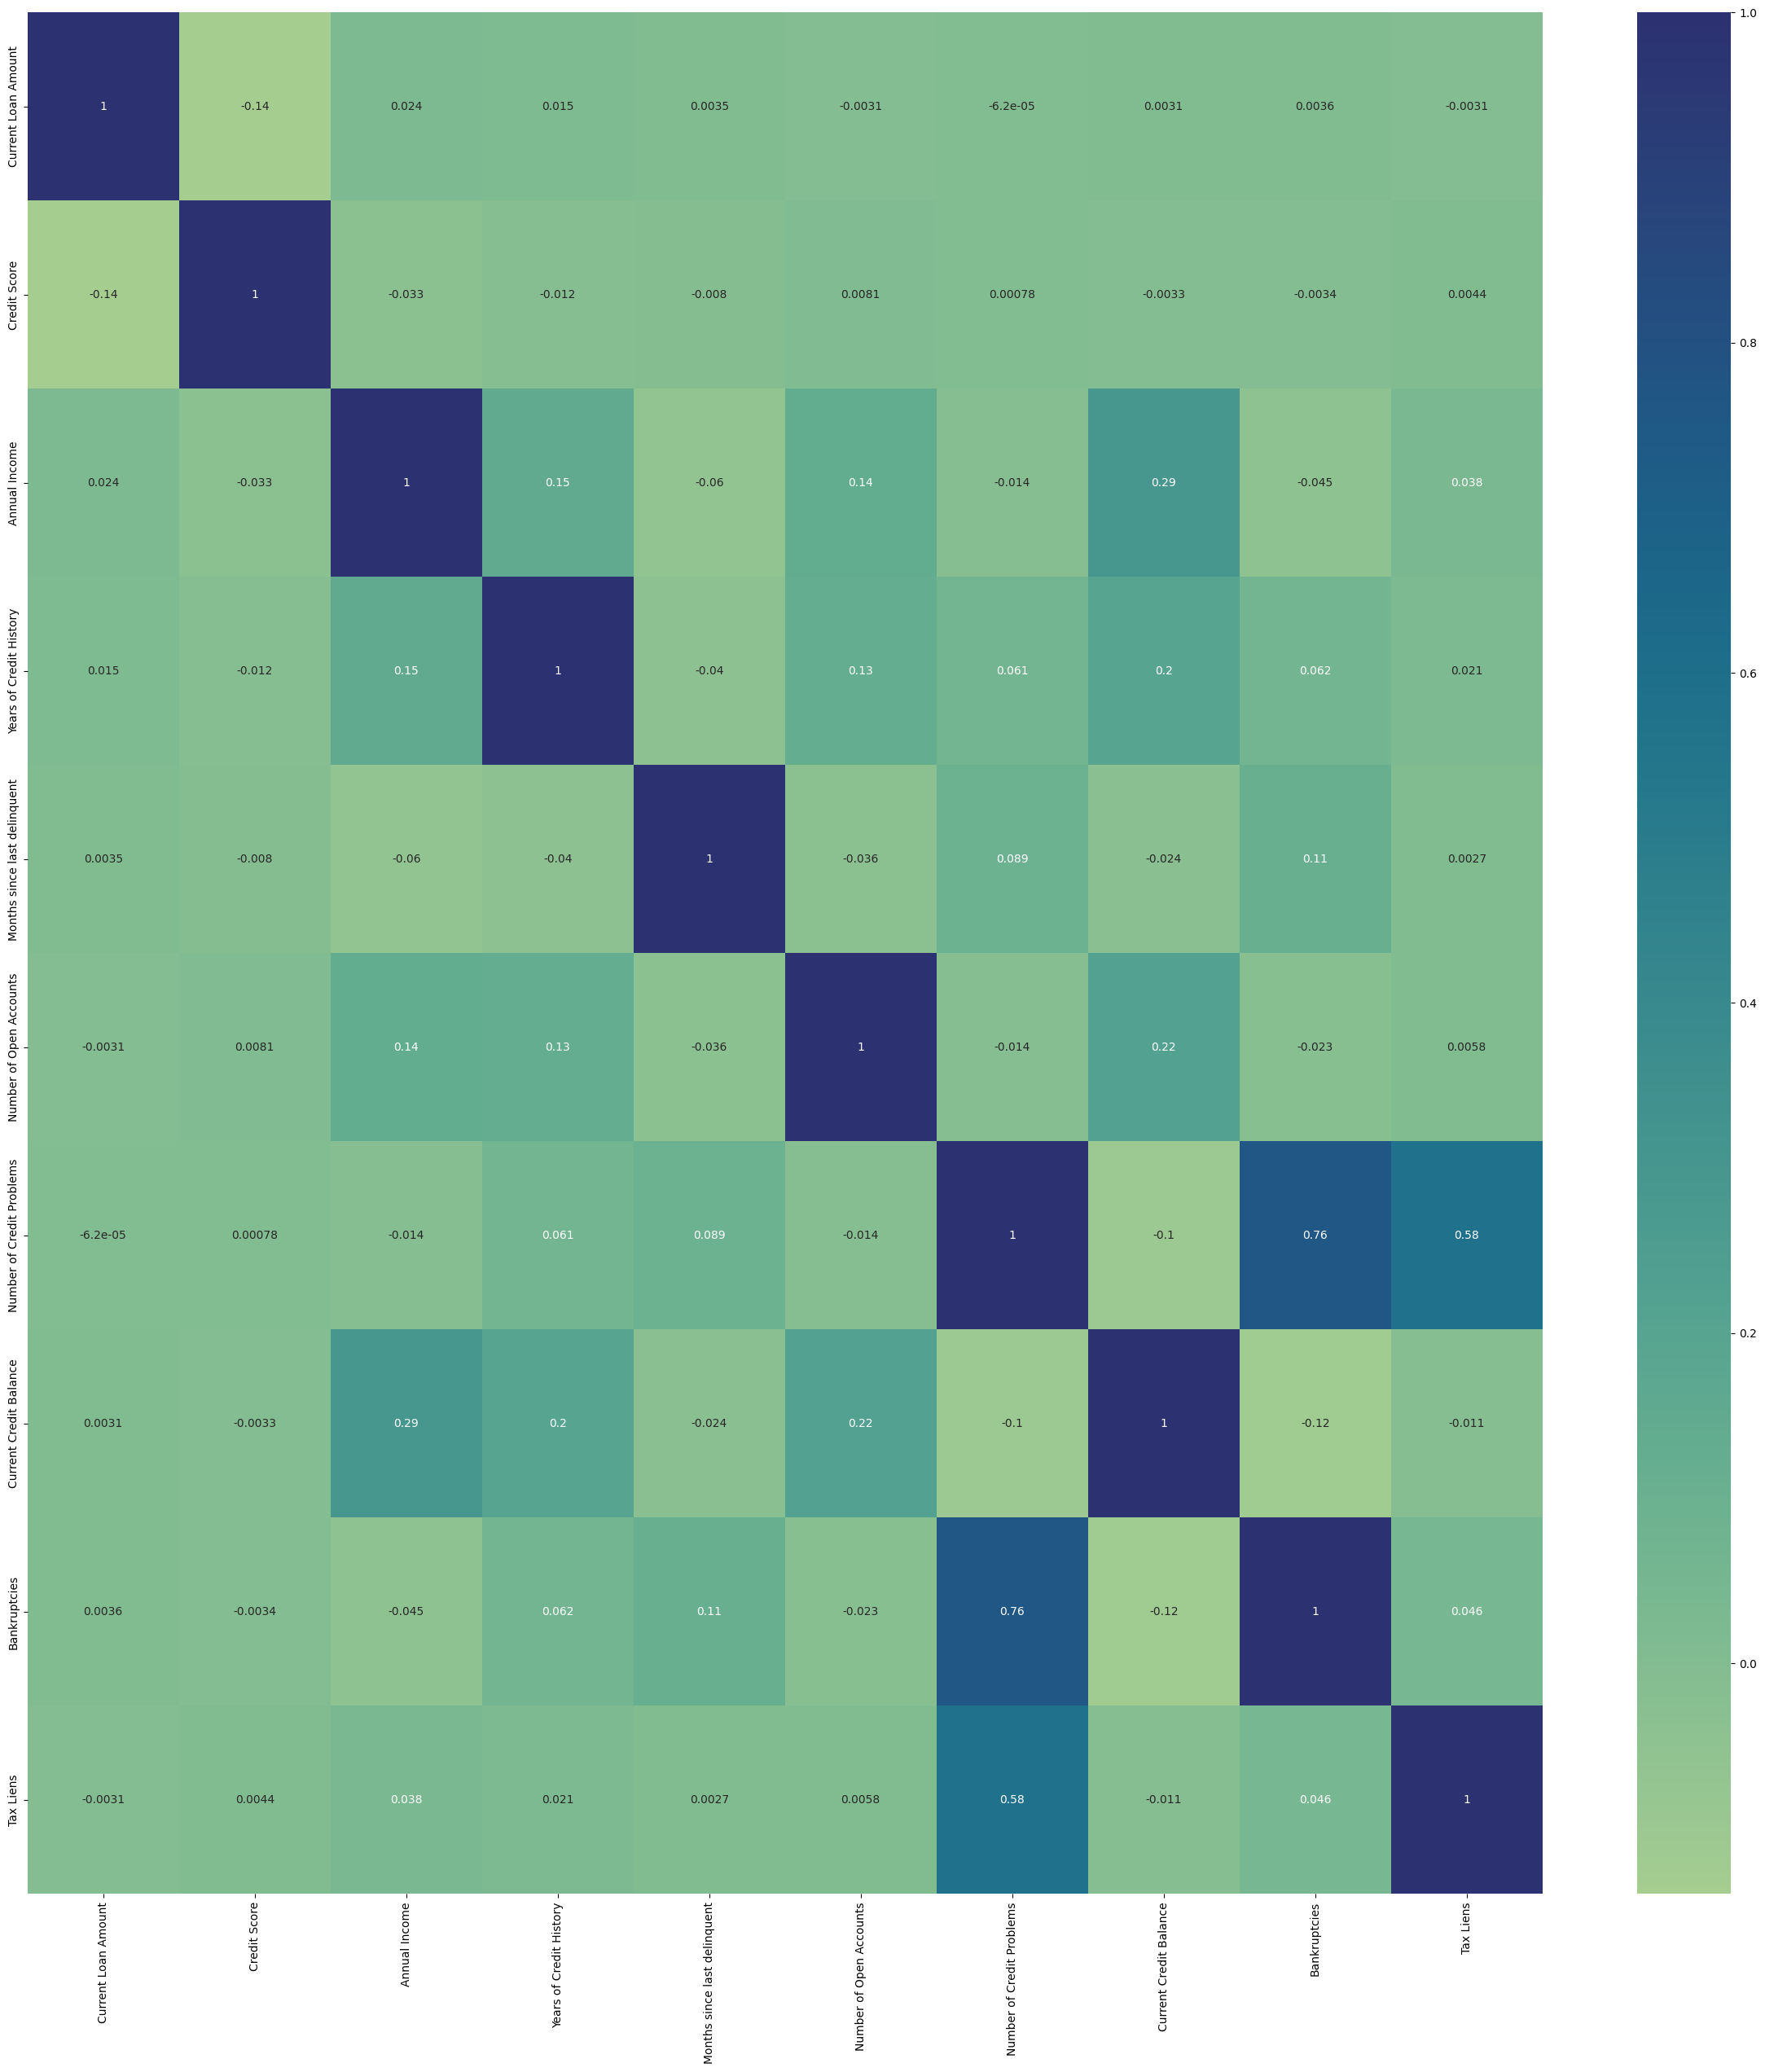

In [8]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='crest')

In [9]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [10]:
print(df['Loan Status'].value_counts())

Loan Status
Fully Paid     176191
Charged Off     80793
Name: count, dtype: int64


### Boş Verileri Doldurma

In [11]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [12]:
df['Credit Score'] = df.groupby('Purpose')['Credit Score'].transform(lambda x: x.fillna(x.mean()))

In [13]:
df['Annual Income'] = df.groupby('Purpose')['Annual Income'].transform(lambda x: x.fillna(x.mean()))

In [14]:
df['Bankruptcies'] = df['Bankruptcies'].fillna(df['Bankruptcies'].mode()[0])

In [15]:
df['Tax Liens'] = df['Tax Liens'].fillna(df['Tax Liens'].mode()[0])

In [16]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job             11476
Home Ownership                       0
Annual Income                        0
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                         0
Tax Liens                            0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  256984 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 256984 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

### Gereksiz ve fazla boş verileri kaldırma 

In [18]:
df.drop(['Loan ID', 'Customer ID','Years in current job','Purpose'], axis=1, inplace=True) #gereksiz verileri siliyoruz.

In [1]:
df.drop(['Months since last delinquent'], axis=1, inplace=True) #çok fazla boş veri var

NameError: name 'df' is not defined

In [20]:
df = df[df['Monthly Debt'] != '#VALUE!']
df = df[df['Maximum Open Credit'] != '#VALUE!']

### Veri Tipi Dönüşümü Yapma

In [21]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].replace('[\$,]', '', regex=True).astype(float)
df['Monthly Debt'] = df['Monthly Debt'].replace('[\$,]', '', regex=True).astype(float)

In [22]:
df = pd.get_dummies(df, columns=['Term', 'Home Ownership'], drop_first=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256980 entries, 0 to 256983
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   256980 non-null  object 
 1   Current Loan Amount           256980 non-null  int64  
 2   Credit Score                  256980 non-null  float64
 3   Annual Income                 256980 non-null  float64
 4   Monthly Debt                  256980 non-null  float64
 5   Years of Credit History       256980 non-null  float64
 6   Number of Open Accounts       256980 non-null  int64  
 7   Number of Credit Problems     256980 non-null  int64  
 8   Current Credit Balance        256980 non-null  int64  
 9   Maximum Open Credit           256980 non-null  float64
 10  Bankruptcies                  256980 non-null  float64
 11  Tax Liens                     256980 non-null  float64
 12  Term_Short Term               256980 non-null  bo

In [24]:
# Loan Status sayısal veriye çevirme get_dummies yapma

In [25]:
df['Loan Status'] = df['Loan Status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [26]:
abs(df.corr(numeric_only=True)['Loan Status']).sort_values(ascending=False)

Loan Status                     1.000000
Credit Score                    0.384050
Current Loan Amount             0.269800
Term_Short Term                 0.183803
Home Ownership_Home Mortgage    0.066487
Home Ownership_Rent             0.062957
Annual Income                   0.061396
Years of Credit History         0.035536
Number of Open Accounts         0.020818
Monthly Debt                    0.016612
Tax Liens                       0.012592
Number of Credit Problems       0.010187
Current Credit Balance          0.008820
Home Ownership_Own Home         0.008307
Maximum Open Credit             0.007922
Bankruptcies                    0.001100
Name: Loan Status, dtype: float64

### Classification işlemleri

In [27]:
# Hedef değişken (y) ve özellikler (X) belirleniyor
x = df.drop('Loan Status', axis=1)  # Özellikler
y = df['Loan Status']  # Hedef değişken

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256980 entries, 0 to 256983
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   256980 non-null  int64  
 1   Current Loan Amount           256980 non-null  int64  
 2   Credit Score                  256980 non-null  float64
 3   Annual Income                 256980 non-null  float64
 4   Monthly Debt                  256980 non-null  float64
 5   Years of Credit History       256980 non-null  float64
 6   Number of Open Accounts       256980 non-null  int64  
 7   Number of Credit Problems     256980 non-null  int64  
 8   Current Credit Balance        256980 non-null  int64  
 9   Maximum Open Credit           256980 non-null  float64
 10  Bankruptcies                  256980 non-null  float64
 11  Tax Liens                     256980 non-null  float64
 12  Term_Short Term               256980 non-null  bo

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
l = LogisticRegression()

In [31]:
l.fit(x_train, y_train)

LogisticRegression()

In [33]:
ltahmin = l.predict(x_test)

In [34]:
accuracy_score(ltahmin,y_test)

0.7490077048797572

In [35]:
d=DecisionTreeClassifier()

In [36]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
dtahmin=d.predict(x_test)

In [38]:
accuracy_score(dtahmin,y_test)

0.7567514981710639

In [39]:
r=RandomForestClassifier()

In [40]:
r.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
rtahmin=r.predict(x_test)

In [42]:
accuracy_score(rtahmin,y_test)

0.8400653747373337

In [43]:
h=GradientBoostingClassifier()

In [44]:
h.fit(x_train,y_train)

GradientBoostingClassifier()

In [45]:
htahmin=h.predict(x_test)

In [46]:
accuracy_score(htahmin,y_test)

0.7644174643941163

In [47]:
k=KNeighborsClassifier()

In [48]:
k.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
ktahmin=k.predict(x_test)

In [50]:
accuracy_score(ktahmin,y_test)

0.7198809245855708

In [51]:
g=GaussianNB()
b=BernoulliNB()

In [52]:
g.fit(x_train,y_train)

GaussianNB()

In [53]:
gtahmin=g.predict(x_test)

In [54]:
accuracy_score(gtahmin,y_test)

0.4479531481049109

In [55]:
b.fit(x_train,y_train)

BernoulliNB()

In [56]:
btahmin=b.predict(x_test)

In [57]:
accuracy_score(btahmin,y_test)

0.6932251537084598